In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Declare a Base using 'automap_base()'
Base = automap_base()

In [11]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [12]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [13]:
# Assign the measurement and station classes to variables called 'Measurement' and 'Station'
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create a session
session = Session(engine)

In [15]:
# Display the first row's columns and data in dictionary format for Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdd35c53d30>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [16]:
# Display the first row's columns and data in dictionary format for Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdd35c894a8>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [17]:




# reflect an existing database into a new model

# reflect the tables

In [18]:
# We can view all of the classes that automap found


In [19]:
# Save references to each table


In [20]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [22]:
# Query database to find the last date of precipitation data available(last datapoint) 
engine.execute('SELECT MAX(date) FROM measurement').fetchall()

[('2017-08-23',)]

In [23]:
last_prcp_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_prcp_data

('2017-08-23')

In [24]:
query_date = dt.date(2017, 8,23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [25]:
date = dt.datetime(2016, 8, 22)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date).order_by(Measurement.date).all()
#results                                                                  
data = list(np.ravel(results))
data                                                                 

['2016-08-23',
 0.0,
 '2016-08-23',
 0.15,
 '2016-08-23',
 0.05,
 '2016-08-23',
 None,
 '2016-08-23',
 0.02,
 '2016-08-23',
 1.79,
 '2016-08-23',
 0.7,
 '2016-08-24',
 0.08,
 '2016-08-24',
 2.15,
 '2016-08-24',
 2.28,
 '2016-08-24',
 None,
 '2016-08-24',
 1.22,
 '2016-08-24',
 2.15,
 '2016-08-24',
 1.45,
 '2016-08-25',
 0.08,
 '2016-08-25',
 0.08,
 '2016-08-25',
 0.0,
 '2016-08-25',
 0.0,
 '2016-08-25',
 0.21,
 '2016-08-25',
 0.06,
 '2016-08-25',
 0.11,
 '2016-08-26',
 0.0,
 '2016-08-26',
 0.03,
 '2016-08-26',
 0.02,
 '2016-08-26',
 0.04,
 '2016-08-26',
 0.0,
 '2016-08-26',
 0.01,
 '2016-08-27',
 0.0,
 '2016-08-27',
 0.18,
 '2016-08-27',
 0.02,
 '2016-08-27',
 0.0,
 '2016-08-27',
 0.12,
 '2016-08-27',
 None,
 '2016-08-28',
 0.01,
 '2016-08-28',
 0.14,
 '2016-08-28',
 0.14,
 '2016-08-28',
 0.14,
 '2016-08-28',
 0.6,
 '2016-08-28',
 2.07,
 '2016-08-29',
 0.0,
 '2016-08-29',
 0.17,
 '2016-08-29',
 0.04,
 '2016-08-29',
 None,
 '2016-08-29',
 0.0,
 '2016-08-29',
 0.35,
 '2016-08-29',
 0.9,


In [26]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
#plt.figure(figsize=(10,20))
df.head(10)
#df.plot.bar()
#plt.tight_layout()
#plt.show()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [27]:
# Use the session to query 

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data (need count? - use.describe?)
group_summ_df = df.groupby("date").describe()
group_summ_df.head()


prcp                                                       
           count      mean       std   min     25%    50%     75%   max
date                                                                   
2016-08-23   6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24   6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25   7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26   6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27   5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data (need count? - use.describe?)
group_summary_df = df.groupby("date").agg(["count","mean", "median","var","std", "sem","min","max"])
group_summary_df.head()


prcp                                                           
           count      mean median       var       std       sem   min   max
date                                                                       
2016-08-23     6  0.451667  0.100  0.499097  0.706468  0.288414  0.00  1.79
2016-08-24     6  1.555000  1.800  0.706510  0.840541  0.343150  0.08  2.28
2016-08-25     7  0.077143  0.080  0.005157  0.071813  0.027143  0.00  0.21
2016-08-26     6  0.016667  0.015  0.000267  0.016330  0.006667  0.00  0.04
2016-08-27     5  0.064000  0.020  0.006680  0.081731  0.036551  0.00  0.18

In [30]:
# Design a query to list all of the stations
list_station = session.query(Station.station).all()
list_station

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [31]:
# Design a query to show how many stations are available in this dataset?
number = session.query(func.count(Station.station)).all()
#number

print(f'Number of Stations:{number[0]}')


Number of Stations:(9,)


In [32]:
# Design a query to list all of the station names
list_name = session.query(Station.name).all()
list_name

[('WAIKIKI 717.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('HONOLULU OBSERVATORY 702.2, HI US'),
 ('MANOA LYON ARBO 785.2, HI US')]

In [33]:
# Query to count all the station names
name_station = session.query(func.count(Station.name)).all()
name_station

[(9)]

In [34]:
station_count = session.query(func.count(Measurement.tobs)).all()
station_count

[(19550)]

In [35]:
station_tobs = session.query(Measurement.station, Measurement.date, Measurement.tobs).all()
station_tobs

[('USC00519397', '2010-01-01', 65.0),
 ('USC00519397', '2010-01-02', 63.0),
 ('USC00519397', '2010-01-03', 74.0),
 ('USC00519397', '2010-01-04', 76.0),
 ('USC00519397', '2010-01-06', 73.0),
 ('USC00519397', '2010-01-07', 70.0),
 ('USC00519397', '2010-01-08', 64.0),
 ('USC00519397', '2010-01-09', 68.0),
 ('USC00519397', '2010-01-10', 73.0),
 ('USC00519397', '2010-01-11', 64.0),
 ('USC00519397', '2010-01-12', 61.0),
 ('USC00519397', '2010-01-14', 66.0),
 ('USC00519397', '2010-01-15', 65.0),
 ('USC00519397', '2010-01-16', 68.0),
 ('USC00519397', '2010-01-17', 64.0),
 ('USC00519397', '2010-01-18', 72.0),
 ('USC00519397', '2010-01-19', 66.0),
 ('USC00519397', '2010-01-20', 66.0),
 ('USC00519397', '2010-01-21', 69.0),
 ('USC00519397', '2010-01-22', 67.0),
 ('USC00519397', '2010-01-23', 67.0),
 ('USC00519397', '2010-01-24', 71.0),
 ('USC00519397', '2010-01-25', 67.0),
 ('USC00519397', '2010-01-26', 76.0),
 ('USC00519397', '2010-01-27', 68.0),
 ('USC00519397', '2010-01-28', 72.0),
 ('USC005193

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [38]:
# Using the most active station "USC00519281" find the maximum temperature from all data points
max_temp_active = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp_active

[(85.0)]

In [39]:
# Using the most active station "USC00519281" find the minimum temperature from all data points
min_temp_active = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
min_temp_active

[(54.0)]

In [40]:
# Using the most active station "USC00519281" find the average temperature from all data points
avg_temp_active = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp_active

[(71.66378066378067)]

In [42]:
# Choose the station with the highest number of temperature observations("USC00519281")
# Query the last 12 months of temperature observation data for this station(date & temperature observation data)
# Most recent date for TOBS data for this station is 2017-08-18
date = dt.datetime(2016, 8, 17)

tobs_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > date).\
    filter(Measurement.station == 'USC00519281').all() 
tobs_results                                                 

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [43]:
# Choose the station with the highest number of temperature observations("USC00519281")
# Query the last 12 months of temperature observation data for this station(temperature observation data only)
# Most recent date for TOBS data for this station is 2017-08-18
date = dt.datetime(2016, 8, 17)

listtobs_results = session.query(Measurement.tobs).filter(Measurement.date > date).\
    filter(Measurement.station == 'USC00519281').all() 
# make data into a list
temp_data = list(np.ravel(listtobs_results))
temp_data

[80.0,
 79.0,
 81.0,
 79.0,
 78.0,
 77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,

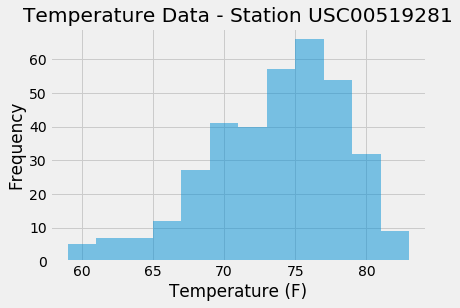

In [49]:
# Plot the results as a histogram of the 12 months of temperature data for the station "USC00519281"
plt.hist(temp_data, 12,
         alpha=0.5)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Temperature Data - Station USC00519281")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
